**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1.   Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2.  For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.   




**Product Portfolio:**


1. The KP281 is an entry-level treadmill that sells for $1,500.

2. The KP481 is for mid-level runners that sell for $1,750.

3. The KP781 treadmill is having advanced features that sell for $2,500.











In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns  

In [ ]:
df = pd.read_csv("/content/aerofit_treadmill.csv")

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# Initial Exploration

In [ ]:
#Checking the null values in the dataset which comes out to be 0.

df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


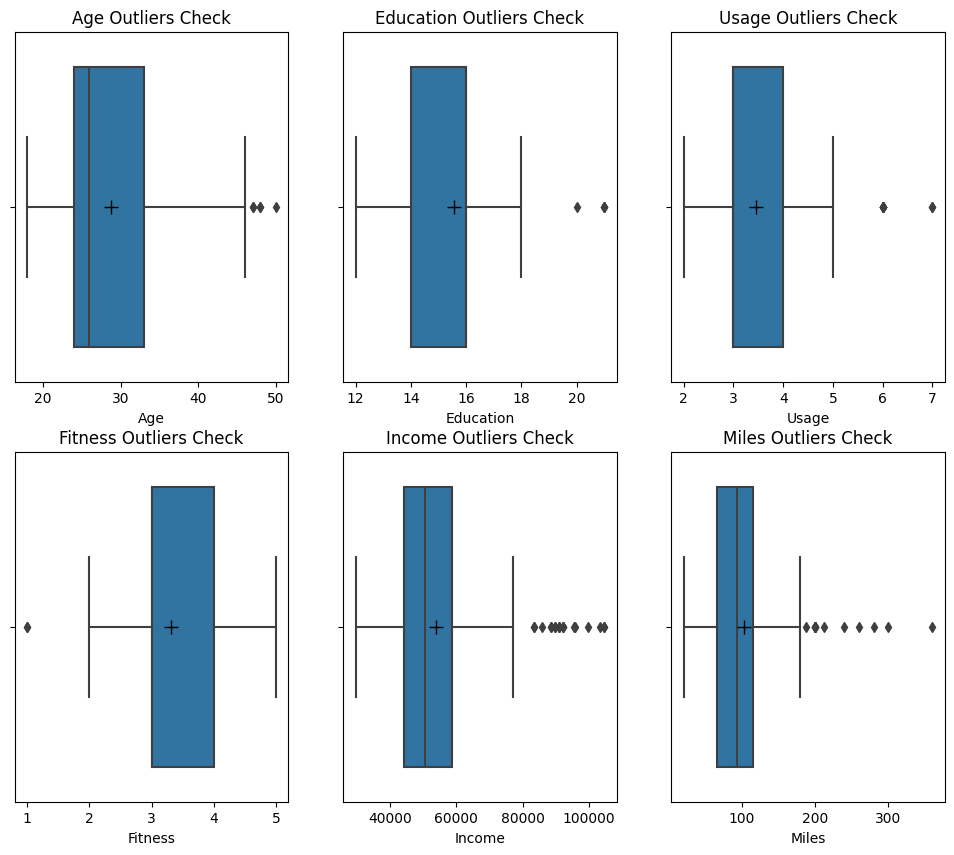

In [ ]:
fig=plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
sns.boxplot(x=df["Age"],showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.title("Age Outliers Check")

plt.subplot(2,3,2)
sns.boxplot(x=df["Education"],showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.title("Education Outliers Check")

plt.subplot(2,3,3)
sns.boxplot(x=df["Usage"],showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.title("Usage Outliers Check")

plt.subplot(2,3,4)
sns.boxplot(x=df["Fitness"],showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.title("Fitness Outliers Check")

plt.subplot(2,3,5)
sns.boxplot(x=df["Income"],showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.title("Income Outliers Check")

plt.subplot(2,3,6)
sns.boxplot(x=df["Miles"],showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.title("Miles Outliers Check")

plt.show()

Conclusions from Initial Exploration.

1. The shape of the dataframe is (180, 9) which reads as 180 rows and 9 columns are present in the dataframe.
2. There are 2 types of dtypes among the 9 columns, namely 6 int64 and 3 object type.
3. On checking the sum of NaN values in the columns it comes out to be zero for each column which means there are no null values.
4. Did df.describe() to check that mean and median are not astronomically different from each other which they are not based on the output of the code.
5. Also plotted a boxplot to check for outliers in all the int columns, "Age" has 3 outliers, "Education" has 2 while "Income" has multiple outliers.

# Non-Graphical and Graphical Analysis

In [ ]:
df.groupby(["Gender"])["Product"].value_counts()

Gender  Product
Female  KP281      40
        KP481      29
        KP781       7
Male    KP281      40
        KP781      33
        KP481      31
Name: Product, dtype: int64

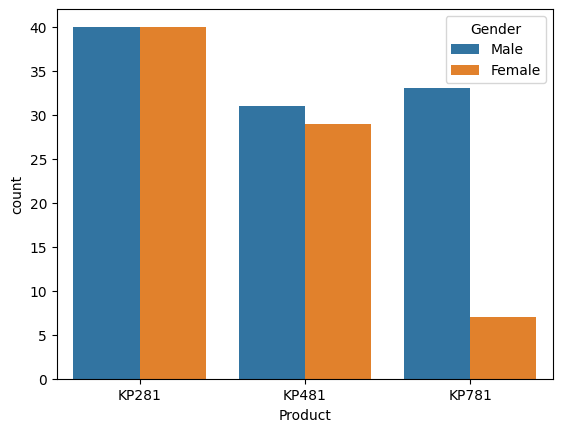

In [ ]:
sns.countplot(data=df,x="Product",hue="Gender")

plt.show()

Based on this analysis we can say that: 


1. KP281 was sold the most with being equally bought by males and females. 
2. KP481 was bought slightly more by males compared to females and was sold second most.
3. KP781 was bought significantly more by males compared to females but was sold the least.



In [ ]:
#Creating a database with female customers only.

df_female = df[df["Gender"]=="Female"]
df_female

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
2,KP281,19,Female,14,Partnered,4,3,30699,66
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
9,KP281,21,Female,15,Partnered,2,3,37521,85
11,KP281,22,Female,14,Partnered,3,2,35247,66
...,...,...,...,...,...,...,...,...,...
152,KP781,25,Female,18,Partnered,5,5,61006,200
157,KP781,26,Female,21,Single,4,3,69721,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
167,KP781,30,Female,16,Partnered,6,5,90886,280


In [ ]:
#Creating a database with male customers only.

df_male = df[df["Gender"]=="Male"]
df_male

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
7,KP281,21,Male,13,Single,3,3,32973,85
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df_male.groupby(["Product"])["Usage"].value_counts()

Product  Usage
KP281    3        18
         4        15
         2         6
         5         1
KP481    3        17
         2         7
         4         7
KP781    4        16
         5         9
         6         5
         7         2
         3         1
Name: Usage, dtype: int64

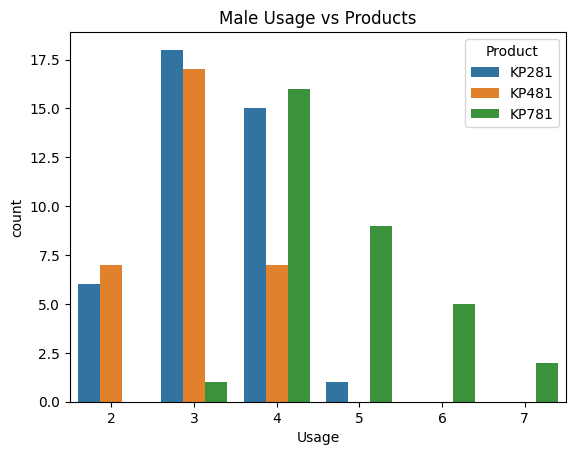

In [ ]:
sns.countplot(data=df_male,x="Usage",hue="Product")

plt.title("Male Usage vs Products")
plt.show()

In [ ]:
df_female.groupby(["Product"])["Usage"].value_counts()

Product  Usage
KP281    3        19
         2        13
         4         7
         5         1
KP481    3        14
         2         7
         4         5
         5         3
KP781    5         3
         4         2
         6         2
Name: Usage, dtype: int64

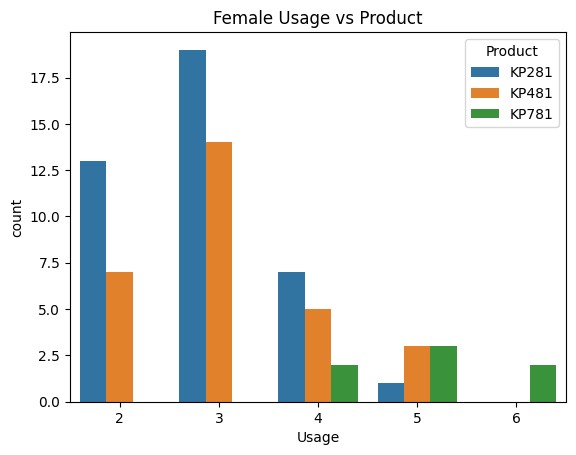

In [ ]:
sns.countplot(data=df_female,x="Usage",hue="Product")

plt.title("Female Usage vs Product")
plt.show()

Comparing both males and females seperately on Usage vs Product type:

1. For males with low usage (2-3 days a week) both KP281 and KP481 are neck to neck popular while females with low usage buy KP281 more comapred to KP481 but these two are more preferred by people who have low usage.
2. Males with medium usage (4 days a week) buy top product KP781 more with KP281 being close second while females here also prefer KP281 over others followed by KP481 and KP781 in that order.
3. Males with high usage (5-7 days a week) buy KP781 only, other products are sold negligible amount in this usage range. Females with high usage also tend to buy KP781 more but here KP481 is also sold as close second.

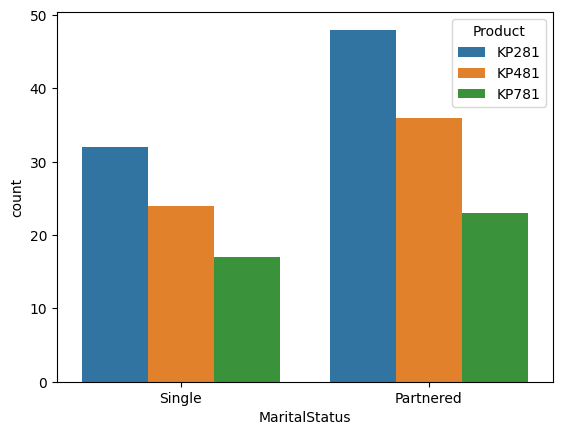

In [ ]:
sns.countplot(x="MaritalStatus",data = df,hue = "Product")

plt.show()

This graph shows the amount of different products bought by Single and Married people. It can be seen that:

> Partnered people have bought more products in all product types compared to single people. With KP281 being the most sold followed by KP481 and KP781 in that order.




In [ ]:
df["Age"].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
df.groupby("Age")["Product"].value_counts().sort_values(ascending=False)

Age  Product
25   KP481      11
23   KP281       8
25   KP781       7
26   KP281       7
25   KP281       7
                ..
33   KP781       1
29   KP481       1
27   KP481       1
19   KP481       1
50   KP281       1
Name: Product, Length: 68, dtype: int64

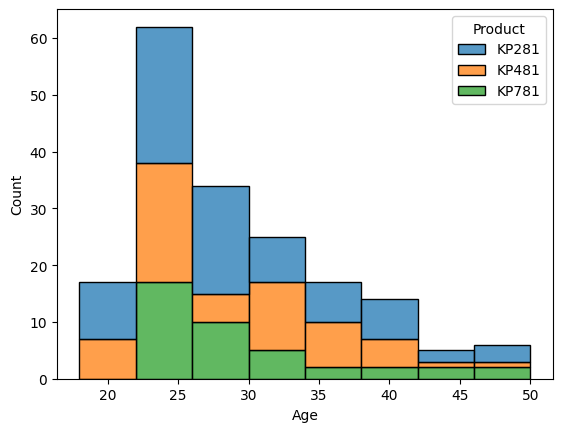

In [ ]:
sns.histplot(data=df, x="Age", hue="Product", multiple="stack",bins=8)

plt.show()

In the graph, one bin has 4 numbers within it. The bins start from 18 and ends at 50, therefore 8 bins are formed.

*   From the graph its visible that the age group 22-26 bought the most amount of products.
*   KP281 is bought among all the age groups. And is most popular among the age group 22-30.
*   KP481 is also bought among all the age groups but in lesser numbers.It also is most popular among 22-26 aged people and 30-35 aged people.
*   KP781 is not sold across all age groups. Age 18-22 have no recorded buyer of KP781. Same as KP281 it is also sold the most in age group 22-30.







In [ ]:
print(df["Income"].min())
print(df["Income"].max())

29562
104581


In [ ]:
df["Income"].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [ ]:
df_male.groupby("Product").agg(["mean","median"])

<ipython-input-23-1ddbe9f1d015>:1: FutureWarning: ['Gender', 'MaritalStatus'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_male.groupby("Product").agg(["mean","median"])


Age         Education            Usage          Fitness         \
              mean median       mean median      mean median      mean median   
Product                                                                         
KP281    28.650000   26.0  14.975000   16.0  3.275000    3.0  3.050000    3.0   
KP481    28.709677   25.0  15.032258   16.0  3.000000    3.0  2.935484    3.0   
KP781    29.545455   27.0  17.212121   18.0  4.727273    4.0  4.636364    5.0   

               Income                Miles         
                 mean   median        mean median  
Product                                            
KP281    46815.975000  46617.0   89.375000   85.0  
KP481    48634.258065  50028.0   88.483871   95.0  
KP781    75825.030303  77191.0  164.121212  160.0

In [ ]:
df_female.groupby("Product").agg(["mean","median"])

<ipython-input-24-872ff77b3b70>:1: FutureWarning: ['Gender', 'MaritalStatus'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_female.groupby("Product").agg(["mean","median"])


Age         Education            Usage          Fitness         \
              mean median       mean median      mean median      mean median   
Product                                                                         
KP281    28.450000   26.5  15.100000   15.5  2.900000    3.0  2.875000    3.0   
KP481    29.103448   29.0  15.206897   16.0  3.137931    3.0  2.862069    3.0   
KP781    27.000000   26.0  17.857143   18.0  5.000000    5.0  4.571429    5.0   

               Income                Miles         
                 mean   median        mean median  
Product                                            
KP281    46020.075000  46048.5   76.200000   75.0  
KP481    49336.448276  48891.0   87.344828   85.0  
KP781    73633.857143  69721.0  180.000000  200.0

Both the tables above show the difference between mean and median of different columns for both the genders.

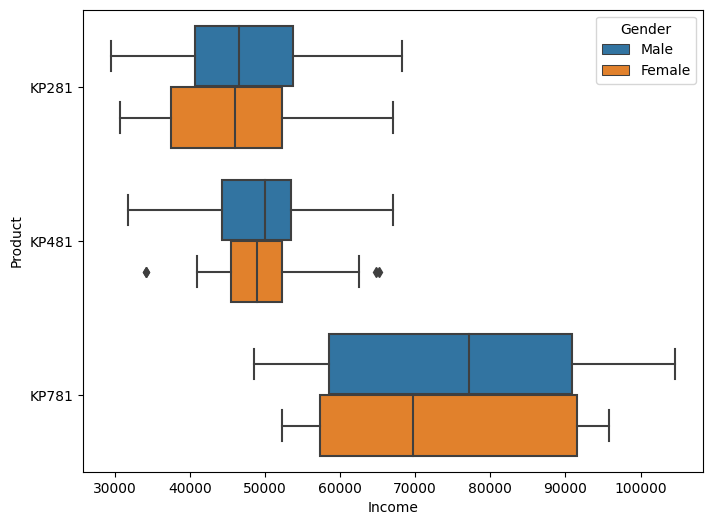

In [ ]:
fig=plt.figure(figsize=(8,6))

sns.boxplot(data=df,y="Product",x="Income",hue="Gender")

plt.show()

This graph shows the average income of males and females in each product category.
*  The graph proves the obvious that people with higher salaries only bought the KP781 model since its the costliest one.
*  The average salary for both males and females in product KP281 category is pretty much same and lies around 46000-47000.
*  The average salary here differs little bit, for males its around 51000 and for females its 49000. Females in this KP481 product category have outliers on both sides, that means comparitively low earning and high earning both type of females have bought this product.
*  In KP781 product category, average salary of males(around 78000) differs from females(around 69000) by a big amount.





In [ ]:
df["Miles"].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

In [ ]:
print(df["Miles"].min())
print(df["Miles"].max())

21
360


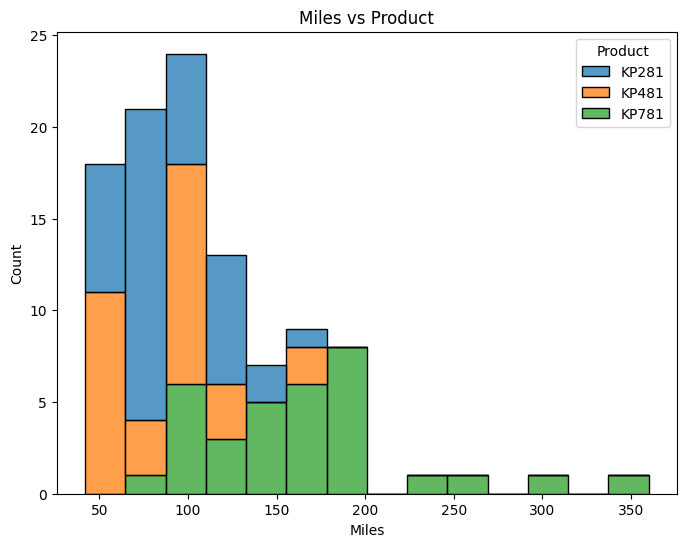

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.histplot(data=df_male,x="Miles",hue="Product",multiple="stack")

plt.title("Miles vs Product")
plt.show()

From the above graph it can seen that males buy KP781 even if they have to run less miles but the main popular category for low miles runner is KP281 and KP481. KP781 sales increases with miles ranging from 120-350.

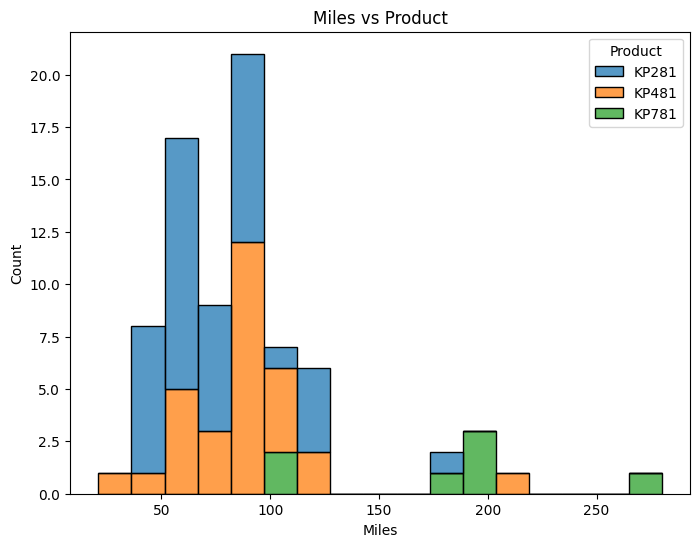

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.histplot(data=df_female,x="Miles",hue="Product",multiple="stack")

plt.title("Miles vs Product")
plt.show()

Compared to males, females prefer buying KP281 and KP481 for lower to mid range miles and only buy KP781 when miles are higher ranged starting from 175 something.

In [ ]:
#Dividing customers into income categories of low, moderate and high based on certain bins. 

income_bins = [29000,45000,70000,105000]
groups = ["low","moderate","high"]
df["income_category"]=pd.cut(df["Income"],bins=income_bins,labels=groups)

df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,income_category
0,KP281,18,Male,14,Single,3,4,29562,112,low
1,KP281,19,Male,15,Single,2,3,31836,75,low
2,KP281,19,Female,14,Partnered,4,3,30699,66,low
3,KP281,19,Male,12,Single,3,3,32973,85,low
4,KP281,20,Male,13,Partnered,4,2,35247,47,low
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,high
176,KP781,42,Male,18,Single,5,4,89641,200,high
177,KP781,45,Male,16,Single,5,5,90886,160,high
178,KP781,47,Male,18,Partnered,4,5,104581,120,high


In [ ]:
#Dividing customers into age categories of young, middle-aged and older based on certain bins. 

age_bins = [17,26,40,50]
age_labels = ["Young","Middle-aged","Older"]
df["age_category"] = pd.cut(df["Age"],bins=age_bins,labels=age_labels)

df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,income_category,age_category
0,KP281,18,Male,14,Single,3,4,29562,112,low,Young
1,KP281,19,Male,15,Single,2,3,31836,75,low,Young
2,KP281,19,Female,14,Partnered,4,3,30699,66,low,Young
3,KP281,19,Male,12,Single,3,3,32973,85,low,Young
4,KP281,20,Male,13,Partnered,4,2,35247,47,low,Young
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,high,Middle-aged
176,KP781,42,Male,18,Single,5,4,89641,200,high,Older
177,KP781,45,Male,16,Single,5,5,90886,160,high,Older
178,KP781,47,Male,18,Partnered,4,5,104581,120,high,Older


In [ ]:
#Marginal Probabilty of what percentage of different products have been sold.

df["Product"].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [ ]:
#Marginal Probability of what percentage are male and what percentage are female customers.

df["Gender"].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [ ]:
#Marginal Probability of what kind of earners are there in the dataset.

df["income_category"].value_counts(normalize=True)

moderate    0.600000
low         0.272222
high        0.127778
Name: income_category, dtype: float64

In [ ]:
#Marginal Probability of partnered and single people in the dataset.

df["MaritalStatus"].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

In [ ]:
#Marginal Probability of what age group have bought what percentage of products.

df["age_category"].value_counts(normalize=True)

Young          0.505556
Middle-aged    0.427778
Older          0.066667
Name: age_category, dtype: float64

In [ ]:
pd.crosstab(index=df["Gender"],columns=df["Product"],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [ ]:
pd.crosstab(index=df["Gender"],columns=df["Product"],margins=True,normalize="index").round(2)

Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.38,0.30,0.32
All,0.44,0.33,0.22


The above crosstab gives the conditional probability:
1. The first row with index female tells the probability of buying different products given that the person is female.
2. The second row with index male tells the probability of buying different products given that the person is male.

In [ ]:
pd.crosstab(df.Product,[df.Gender,df.income_category],margins=True,normalize="columns").round(2)

Gender          Female                Male                 All
income_category    low moderate high   low moderate high      
Product                                                       
KP281             0.71     0.47  0.0  0.68     0.39  0.0  0.44
KP481             0.29     0.45  0.0  0.32     0.39  0.0  0.33
KP781             0.00     0.08  1.0  0.00     0.22  1.0  0.22

The above table gives the conditional probability of buying a product given the income category of the person.


> For example the probabilty of buying KP781 when the male is high earning male is 0.22



In [ ]:
pd.crosstab(df.Product,[df.Gender,df.MaritalStatus],margins=True,normalize="columns").round(2)

Gender           Female             Male          All
MaritalStatus Partnered Single Partnered Single      
Product                                              
KP281              0.59   0.43      0.34   0.44  0.44
KP481              0.33   0.47      0.34   0.23  0.33
KP781              0.09   0.10      0.31   0.33  0.22

The above table gives the conditional probabiltiy of buying a product given that the person is married or partnered.


> The probability of buying the top product KP781 given a male is partnered is 0.31



In [ ]:
pd.crosstab(index=df["income_category"],columns=df["Product"],margins=True,normalize="index").round(2)

Product,KP281,KP481,KP781
income_category,,,
low,0.69,0.31,0.00
moderate,0.43,0.42,0.16
high,0.00,0.00,1.00
All,0.44,0.33,0.22


The above table gives the probability of buying a product type given that you are a certain income category.


> The probability of a person buying KP781 given they are in low income category is 0.



In [ ]:
pd.crosstab(df.Product,[df.Gender,df.age_category],margins=True,normalize="columns").round(2)

Gender       Female                    Male                     All
age_category  Young Middle-aged Older Young Middle-aged Older      
Product                                                            
KP281          0.53        0.49   1.0  0.40        0.38  0.33  0.44
KP481          0.37        0.43   0.0  0.32        0.29  0.22  0.33
KP781          0.11        0.09   0.0  0.28        0.33  0.44  0.22

The above table gives the probability of buying a product given that the customer is a male or female and belong to a certain age group.


> Probability of older females buying KP781 is 0, KP481 is 0 and KP281 is 1. While the probability of older males buying KP781 is 0.44, KP481 is 0.22 and KP281 is 0.33



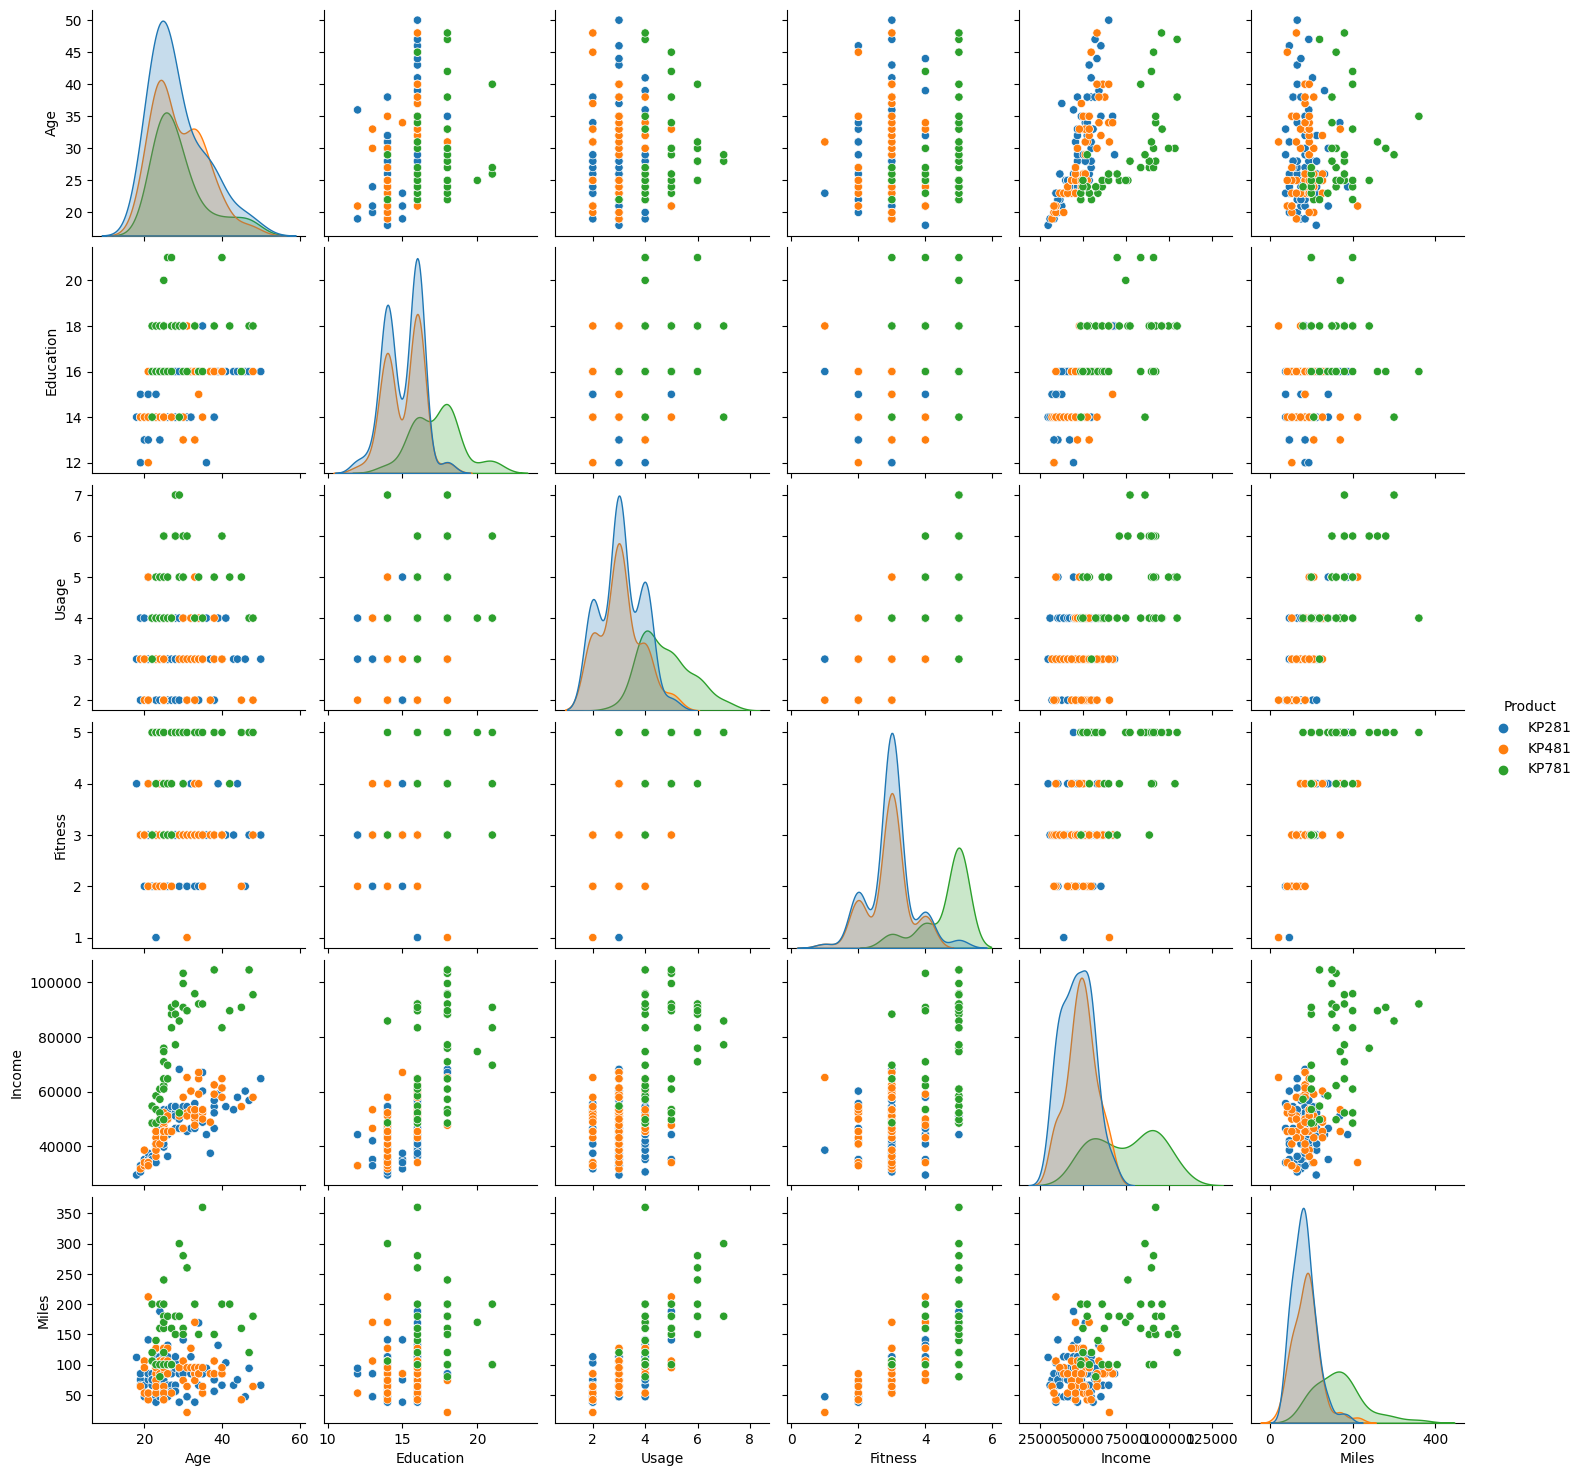

In [ ]:
#Plotting a pairplot to see the distribution of variables and relations between different variable in tha dataset.

sns.pairplot(data=df,hue="Product")

plt.show()

# Comments on range of variables and their relationships

*   The range of Age is from 18 to 50 years. Its relationship with Usage is that with increasing age usage drops a little, usage in age group 20-35 is highest. 
*   Fitness with age doesn't necessarily decrease as shown in the pairplot, some higher aged people rated themselves 3 in fitness and some rated themselves 5.
*   Miles is higher in mid age range i.e 30-40 years while it gets lower in both younger age group 20-30 years and old age group 40-50 years.
*   People who rated themselves higher in fitness usually have higher Miles and Usage too.
*   Usage ranges from 2-7 days a week.
*   Miles and Usage go hand in hand as one of them increases other also increases.
*   In the Income graphs green dots(KP781) are usually on the higher end of the income since they are the costliest product category. 







# Missing Values And Outlier Detection

In [ ]:
#Checking the null values in the dataset which comes out to be 0.

df.isna().sum()

Product            0
Age                0
Gender             0
Education          0
MaritalStatus      0
Usage              0
Fitness            0
Income             0
Miles              0
income_category    0
dtype: int64

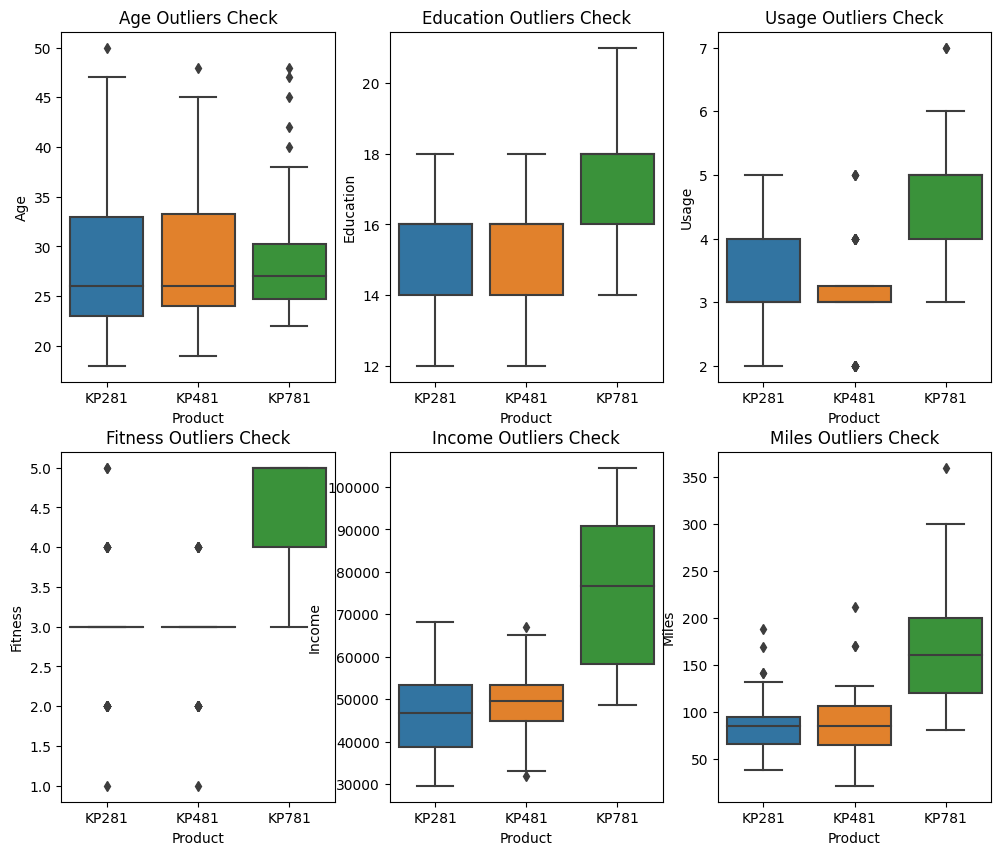

In [ ]:
#Checking the outliers for different products against all the categorical variables in the dataset. 

fig=plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
sns.boxplot(data=df,x="Product",y="Age")
plt.title("Age Outliers Check")

plt.subplot(2,3,2)
sns.boxplot(data=df,x="Product",y="Education")
plt.title("Education Outliers Check")

plt.subplot(2,3,3)
sns.boxplot(data=df,x="Product",y="Usage")
plt.title("Usage Outliers Check")

plt.subplot(2,3,4)
sns.boxplot(data=df,x="Product",y="Fitness")
plt.title("Fitness Outliers Check")

plt.subplot(2,3,5)
sns.boxplot(data=df,x="Product",y="Income")
plt.title("Income Outliers Check")

plt.subplot(2,3,6)
sns.boxplot(data=df,x="Product",y="Miles")
plt.title("Miles Outliers Check")

plt.show()